# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"


In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
Mice_count = combined_data_df["Mouse ID"].nunique()
Mice_count

249

In [6]:
# Uniquely identify data by Mouse ID and Timepoint
# The identify duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Identified_mice_duplicate = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
Identified_mice_duplicate

array(['g989'], dtype=object)

In [7]:
# Optional: Obtaining all the data for the duplicate mouse ID. 
duplicate_mice_ID_df = combined_data_df.loc[combined_data_df['Mouse ID'] == 'g989', :]
duplicate_mice_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df = combined_data_df[combined_data_df['Mouse ID'].isin(Identified_mice_duplicate)==False]
Clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
Clean_Mice_count = Clean_df["Mouse ID"].nunique()
Clean_Mice_count

248

## Summary Statistics

In [10]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean_clean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).mean()
Median_clean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).median()
Var_clean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).var()
Std_clean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).std()
sem_clean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.

Summary_df = pd.DataFrame({"Mean Tumor Volume":Mean_clean, 
                        "Median Tumor Volume":Median_clean,
                        "Tumor Volume Variance":Var_clean,
                        "Tumor Volume Std. Dev.":Std_clean,
                        "Tumor Volume Std. Err.":sem_clean})
Summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_Stat_Aggre = Clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Summary_Stat_Aggre

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Calculate the total number of rows for each drug regimen 
Count_per_regimen = Clean_df["Drug Regimen"].value_counts()
Count_per_regimen


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

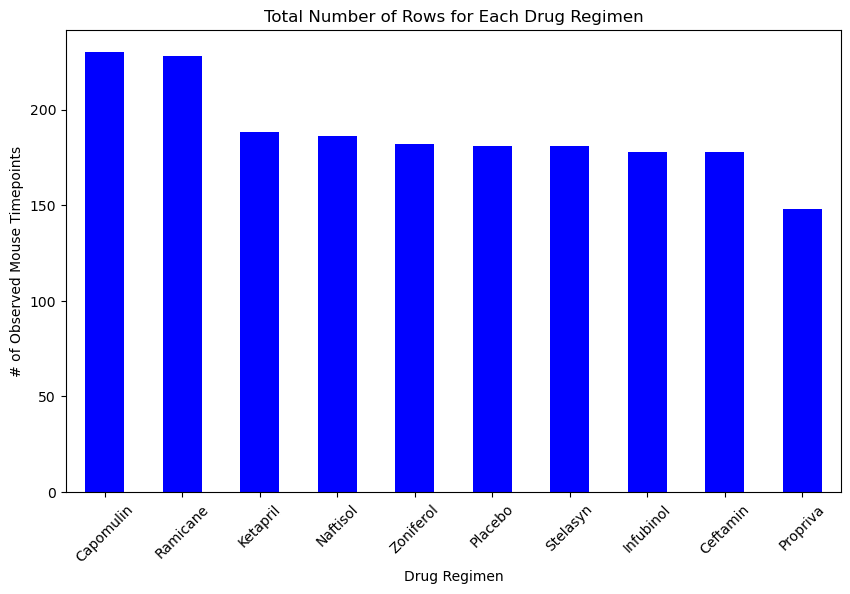

In [13]:
# Generate a bar plot using Pandas.
Count_per_regimen.plot(kind='bar', figsize=(10,6), color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

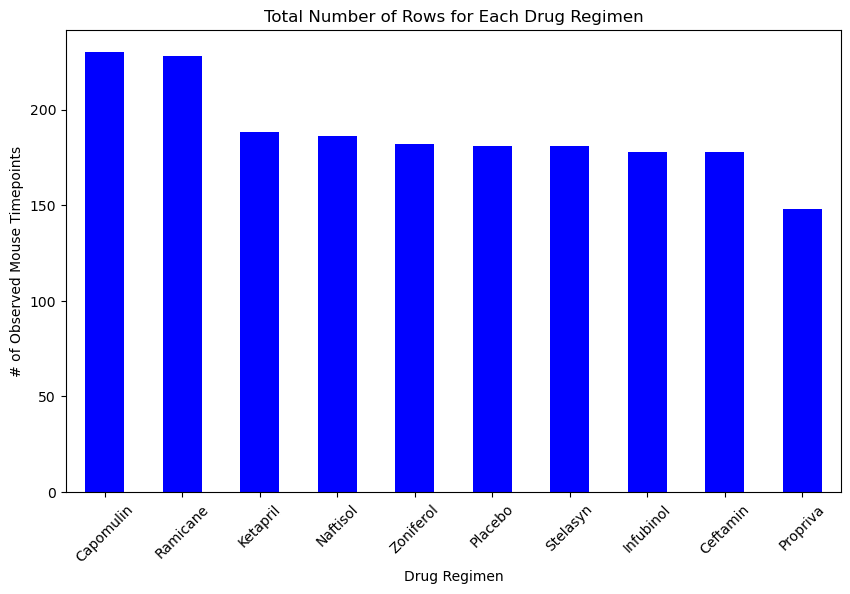

In [14]:
# Alternatively: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Count_per_regimen.plot(kind='bar', figsize=(10, 6), color='blue'); plt.title('Total Number of Rows for Each Drug Regimen'); plt.xlabel('Drug Regimen'); plt.ylabel('# of Observed Mouse Timepoints'); plt.xticks(rotation=45)
plt.show()

In [15]:
# First calculate the count of female and male mice
Mice_Gender_counts = Clean_df['Sex'].value_counts()
Mice_Gender_counts
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Sex
Male      958
Female    922
Name: count, dtype: int64

In [16]:
# First calculate the count of female and male mice
Mice_Gender_counts = Clean_df['Sex'].value_counts()
#Sort the DataFrame by values in descending order
Mice_Gender_counts_sorted = Mice_Gender_counts.sort_values(ascending=False)


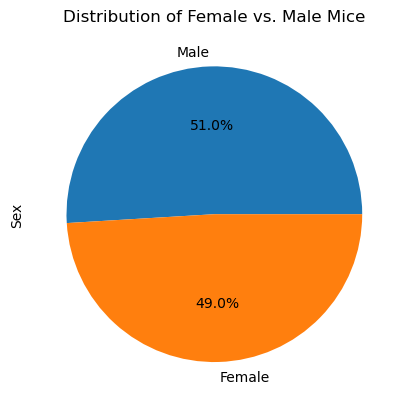

In [17]:
Mice_Gender_counts_sorted.plot(kind='pie', autopct='%1.1f%%',)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.show()

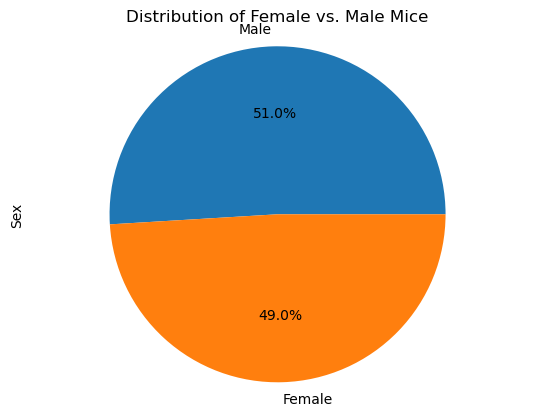

In [18]:

#First define the data for the pie chart
sizes = [958, 922]
labels = ['Male', 'Female']
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse


#Timepoint_max_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
